### Predicting Google's stock price

In [1]:
## Libraries needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## import training set
dataset_train = pd.read_csv('C:/Users/ldmag/Desktop/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 3 - Recurrent Neural Networks (RNN)/Section 12 - Building a RNN/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [4]:
dataset_train.head(15)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [6]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [7]:
## preprocessing and feature engineering
# use normalisation when output layer is sigmoid function
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [9]:
# data structure for timesteps and 1 output
X_train = []
Y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [10]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [11]:
print(Y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [12]:
# reshape to change dimension (input shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [13]:
X_train.shape

(1198, 60, 1)

In [14]:
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [15]:
## building the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [16]:
regressor = Sequential()
# add first LSTM layer and dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [17]:
# add second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True)) # input shape not needed because of units argument
regressor.add(Dropout(0.2))

In [18]:
# add third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [19]:
# add fourth LSTM layer
regressor.add(LSTM(units=50, return_sequences=False)) #final lstm layer does not need to produce more neurons
regressor.add(Dropout(0.2))

In [20]:
# add output layer
regressor.add(Dense(units=1))

In [21]:
# compile 
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
## fit to training set
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)


Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0437
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0052
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - l

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0017
Epoch 96/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 97/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0013
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0014


In [23]:
## making predictions and visualization 
# retrieving stock price in 2017
dataset_test = pd.read_csv('C:/Users/ldmag/Desktop/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 3 - Recurrent Neural Networks (RNN)/Section 12 - Building a RNN/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

# get predicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

# reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)

# inverse scaling
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [24]:
print(predicted_stock_price)

[[783.29767]
 [780.2015 ]
 [780.7363 ]
 [782.12415]
 [785.49817]
 [791.5557 ]
 [796.67255]
 [798.25684]
 [798.39886]
 [798.371  ]
 [798.48334]
 [798.51184]
 [798.53424]
 [799.284  ]
 [800.3369 ]
 [805.5352 ]
 [812.7446 ]
 [820.04736]
 [823.373  ]
 [817.94165]]


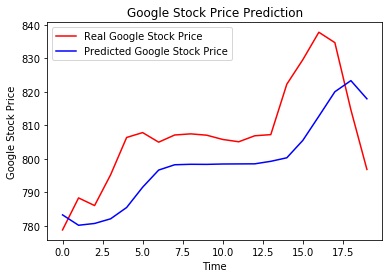

In [25]:
## visualization
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()